# 선형 회귀분석의 기초

회귀분석(regression analysis)은 독립 변수 $x$와 이에 대응하는 종속 변수 $y$간의 관계를 정량화하는 작업이다. 

회귀분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다. 여기에서는 결정론적 모형에 대해 설명한다.
결정론적 모형은 단순히 독립 변수 $x$에 대해 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ \hat{y} = f \left( x \right) \approx y $$

만약 독립 변수 $x$와 이에 대응하는 종속 변수 $y$간의 관계가 다음과 같은 선형 함수 $f(x)$이면 **선형 회귀분석(linear regression analysis)**이라고 한다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx $$

위 식에서 $w_0, \cdots, w_D$를 함수 $f(x)$의 계수(coefficient)이자 이 선형 회귀모형의 **모수(parameter)**라고 한다. 

## 바이어스 오그멘테이션

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다. 이를 **바이어스 오그멘테이션**(bias augmentation)이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 (바이어스 오그멘트된) 가중치 벡터와 (바이어스 오그멘트된) 입력 데이터 벡터의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

상수항이 0이 아닌 경우에는 항상 바이어스 오그멘테이션을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 바이어스 오그멘테이션이 되어 있는 경우가 많다.  

다음은 바이어스 오그멘테이션을 하는 코드 예제이다.

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [2]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

StatsModels에는 바이어스 오그멘테이션을 위한 `add_constant` 함수가 제공된다.

In [4]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS

OLS(Ordinary Least Squares)는 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

우리가 사용하는 예측 모형은 다음과 같은 바이어스 오그멘트된 선형 모형이다.

$$ \hat{y} = Xw $$

이때 잔차 벡터와 잔차 제곱합은 다음과 같다.

$$ e = {y} - \hat{y} = y - Xw $$

$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

위에서 구한 잔차 제곱합의 최소값을 구하기 위해 미분 즉, 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$ X^TX w^{\ast} = X^T y $$

만약 $X^TX$ 행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w^{\ast}$를 구할 수 있다.

$$  w^{\ast} = (X^TX)^{-1} X^T y $$


$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 $f(w)$의 최고값(maximum)이 아닌 최저값(minimum)이 되려면 $X^TX$가 양한정(positive definite)이어야 한다. (양한정인 행렬의 고윳값은 양수이므로 대각분해에 의해 역행렬이 항상 존재한다.)

즉, 0-벡터가 아닌 모든 $v$에 대해 $$ v^TX^TXv > 0 $$

$$ v^TX^TXv = 0 \;\; \leftrightarrow \;\; v = 0 $$

다음 식에서 $Xv=0$인 벡터가 $v=0$밖에 없는 경우에만 이차 형식의 값이 0이 된다.

$$ v^TX^TXv = (Xv)^T(Xv) = u^Tu > 0  $$

$$ v^TX^TXv = 0 \;\; \leftrightarrow \;\; u = 0 $$

$$ v=0  \;\; \leftrightarrow \;\; u = Xv = 0 $$

$Xv$는 $X$를 이루는 각 열벡터의 선형 조합이다.

$$ 
Xv 
= \begin{bmatrix} c_1 & \cdots & c_D \end{bmatrix} \begin{bmatrix} v_1 \\ \vdots \\ v_D \end{bmatrix} 
= v_1 c_1 + \cdots + v_D c_D
$$

$Xv=0$인 벡터가 $v=0$밖에 없는 경우는 $X$가 풀랭크인 경우, 즉  $X$의 각 행렬이 서로 독립인 경우이다. 따라서 **독립 변수들이 서로 선형 독립이면 $X^TX$가 양한정이고 OLS의 해가 존재한다.**

## 직교 방정식

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 **직교 방정식(Normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

직교 방정식을 인수 분해하면

$$ X^T (y - X w ) = 0 $$

$$ X^T e = 0 $$

즉, $c_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때 모든 차원 $d \; (d=1, \ldots, D)$에 대해  $c_d$는 잔차 벡터 $e$와 수직을 이룬다.

$$ c_d^T e = 0 \;\;\; (d=1, \ldots, D) $$

또는 

$$ c_d \perp e \;\;\; (d=1, \ldots, D) $$

직교 방정식으로부터 다음과 같은 성질을 알 수 있다.

(1) X가 1-벡터를 가지고 augmented 되어 있는 경우에는 잔차 벡터의 원소의 합은 0이다. 즉 잔차의 평균은 0이다.

$$ \sum_{i=0}^N e_i = 0 $$

(2) $x$ 데이터의 평균값 $\bar{x}$에 대한 예측값은 $y$ 데이터의 평균값 $\bar{y}$이다.

$$ \bar{y} = w^T \bar{x} $$

1번 성질은 $X$의 첫번째 열이 1-벡터라는 것을 이용하면 쉽게 증명할 수 있다.

$$ c_1^T e = \mathbf{1}^T e = \sum_{i=0}^N e_i = 0 $$

2번 성질은 다음처럼 증명한다.

$$
\begin{eqnarray}
\bar{y} 
&=& \dfrac{1}{N}\mathbf{1}^T y \\
&=& \dfrac{1}{N}\mathbf{1}^T (Xw + e) \\
&=& \dfrac{1}{N}\mathbf{1}^TXw + \dfrac{1}{N}\mathbf{1}^Te \\
&=& \dfrac{1}{N}\mathbf{1}^TXw \\
&=& \dfrac{1}{N}\mathbf{1}^T \begin{bmatrix}c_1 & \cdots & c_M \end{bmatrix} w \\
&=& \begin{bmatrix}\dfrac{1}{N}\mathbf{1}^Tc_1 & \cdots & \dfrac{1}{N}\mathbf{1}^Tc_M \end{bmatrix} w \\
&=& \begin{bmatrix}\bar{c_1} & \cdots & \bar{c_M} \end{bmatrix} w \\
&=& \bar{x}^T w \\
\end{eqnarray}
$$

두번째 성질을 사용하면 **원래 데이터를 사용한 회귀 분석 결과와 원래 데이터에서 평균이 0이 되게 평균 이동을 한 데이터를 사용한 회귀 분석 결과가 같다**는 것을 보일 수 있다.

$$ y ' = y - \bar{y}, \;\; X' = X - \bar{X} $$

$$ \hat{y}' = X' w' $$ 

$$ \hat{y} - \bar{y} = (X - \bar{X})w' $$

$$ \hat{y} = Xw' $$

## NumPy를 이용한 선형회귀분석

다음은 NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형회귀분석을 하는 예제이다.

우선 `make_regression` 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [5]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

우리가 준 bias 값은 100이고 `make_regression` 명령이 생성한 모수 값은 다음과 같다.

In [6]:
coef

array(80.71051956187792)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$ y = 100 + 80.7105 x + \epsilon $$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [7]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[ 102.02701439],
       [  81.59750943]])

즉, 다음 방정식을 이용하여 y를 예측한다.

$$ \hat{y} = 102.0270 + 81.5975 x $$

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 결과는 실제(자연 법칙)와 **비슷하지만 정확하지는 않다**는 점이다.

In [8]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

다음 코드는 여러가지 새로운 $x$값에 대해 $\hat{y}$을 구해본 결과를 원래 데이터와 비교한 것이다.

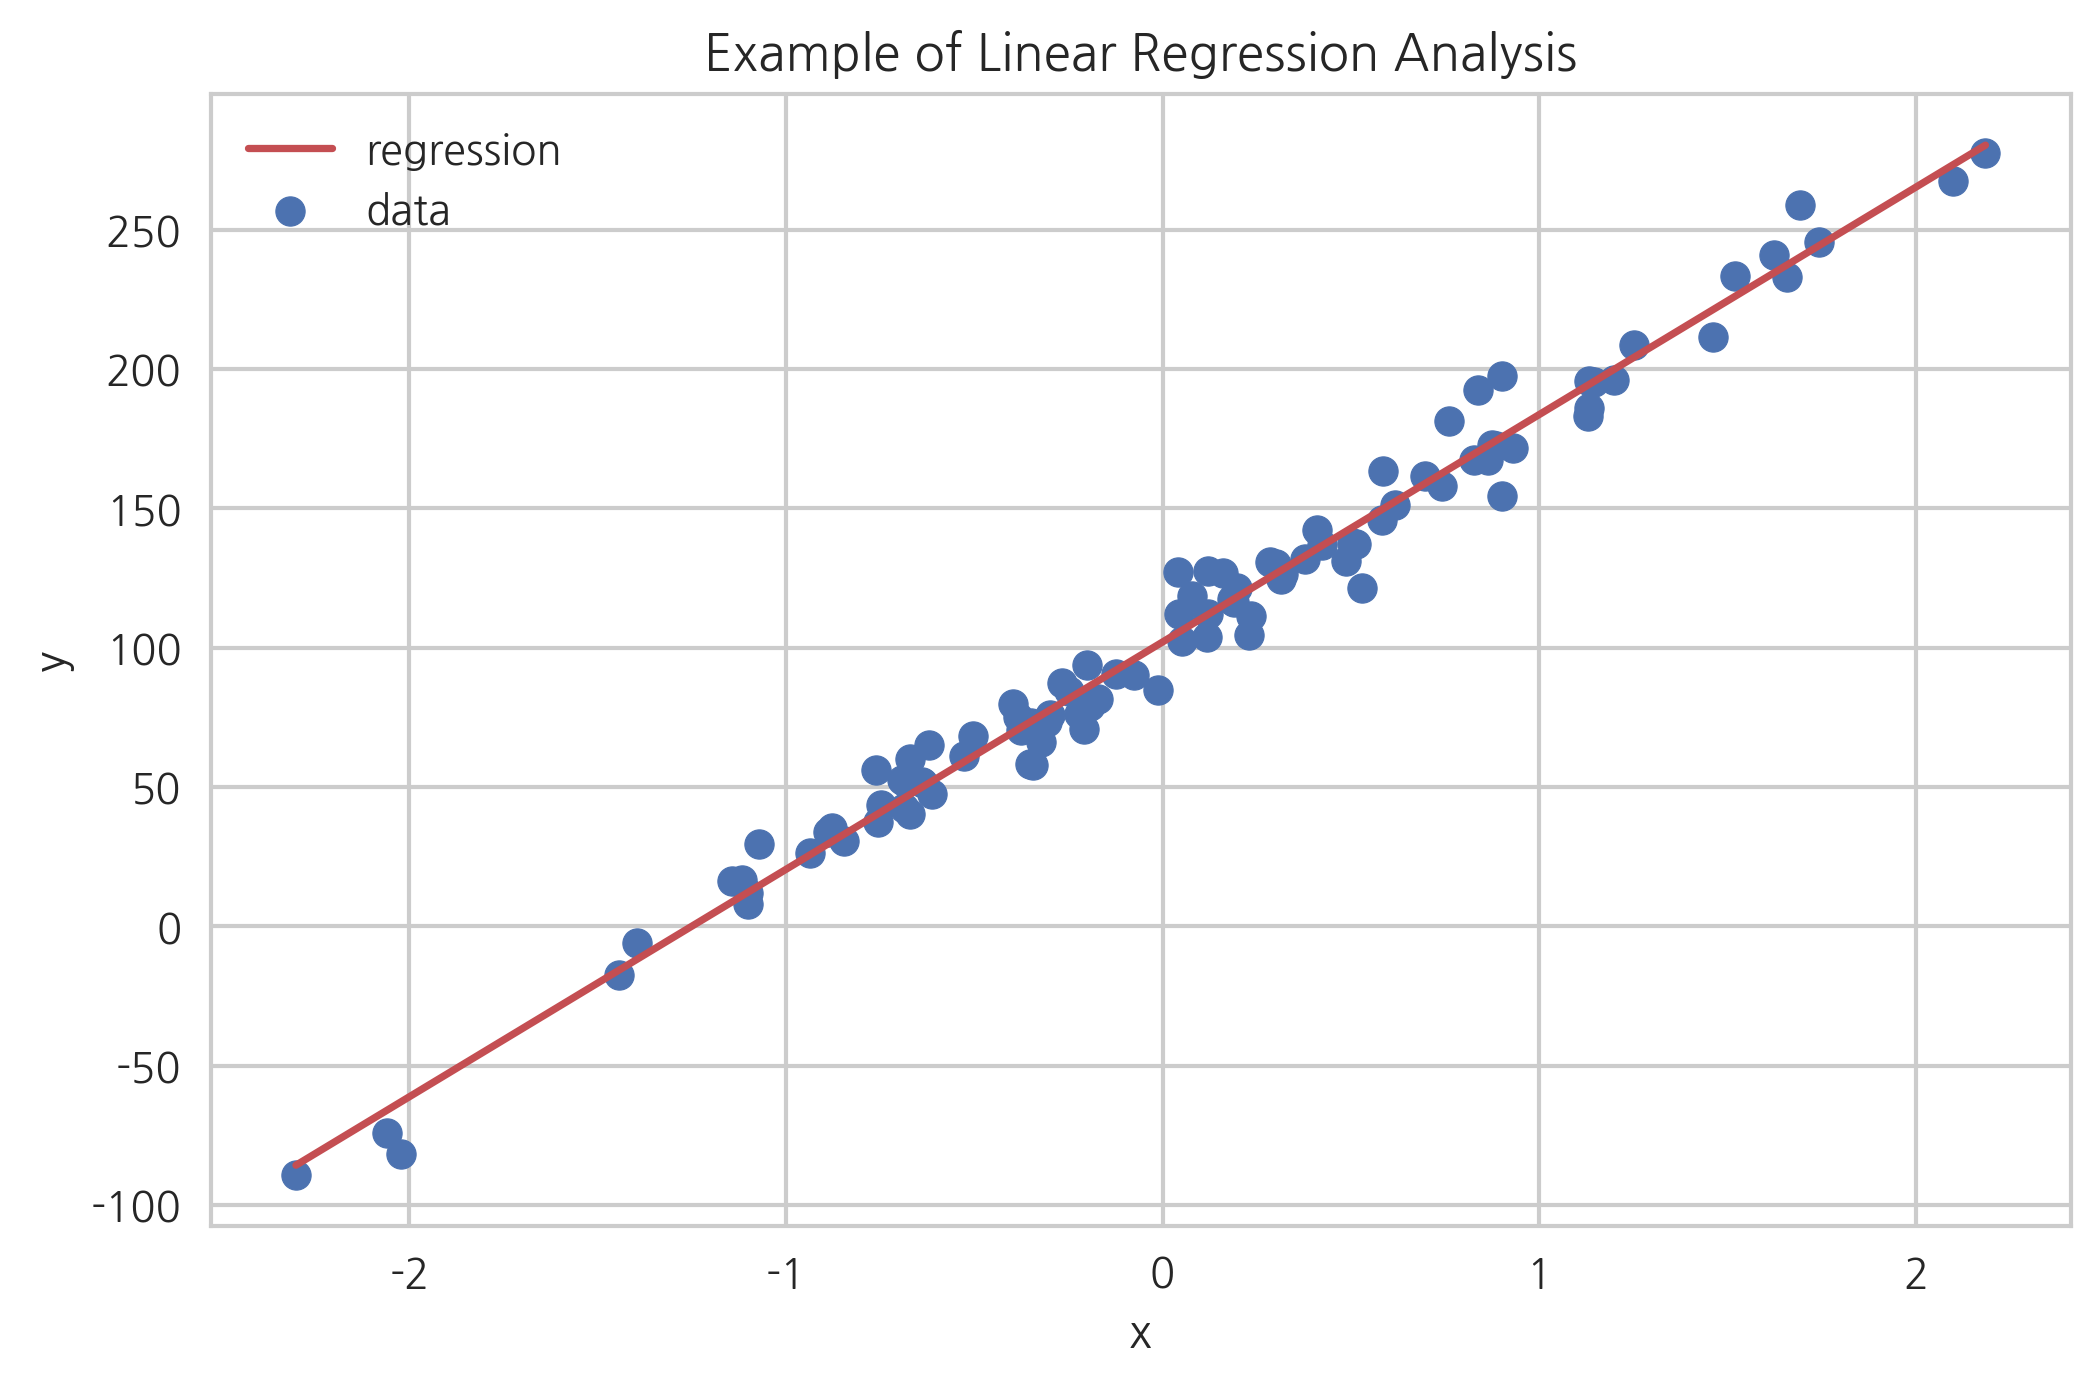

In [9]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

##  Scikit-Learn 패키지를 사용한  선형회귀분석

Scikit-Learn 패키지를 사용하여 선형회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.

1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    `fit_intercept` 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트 값이 `True`이고 만약 상수항이 없으면 `fit_intercept=False`로 설정한다.

2. `fit` 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.
    ```
    model = model.fit(X, y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 `fit` 메서드는 객체 자신을 반환한다.
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

다음은 보스턴 집값 데이터를 사용하여 회귀분석을 하는 예이다.

In [10]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [11]:
model_boston.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [12]:
model_boston.intercept_

36.491103280361912

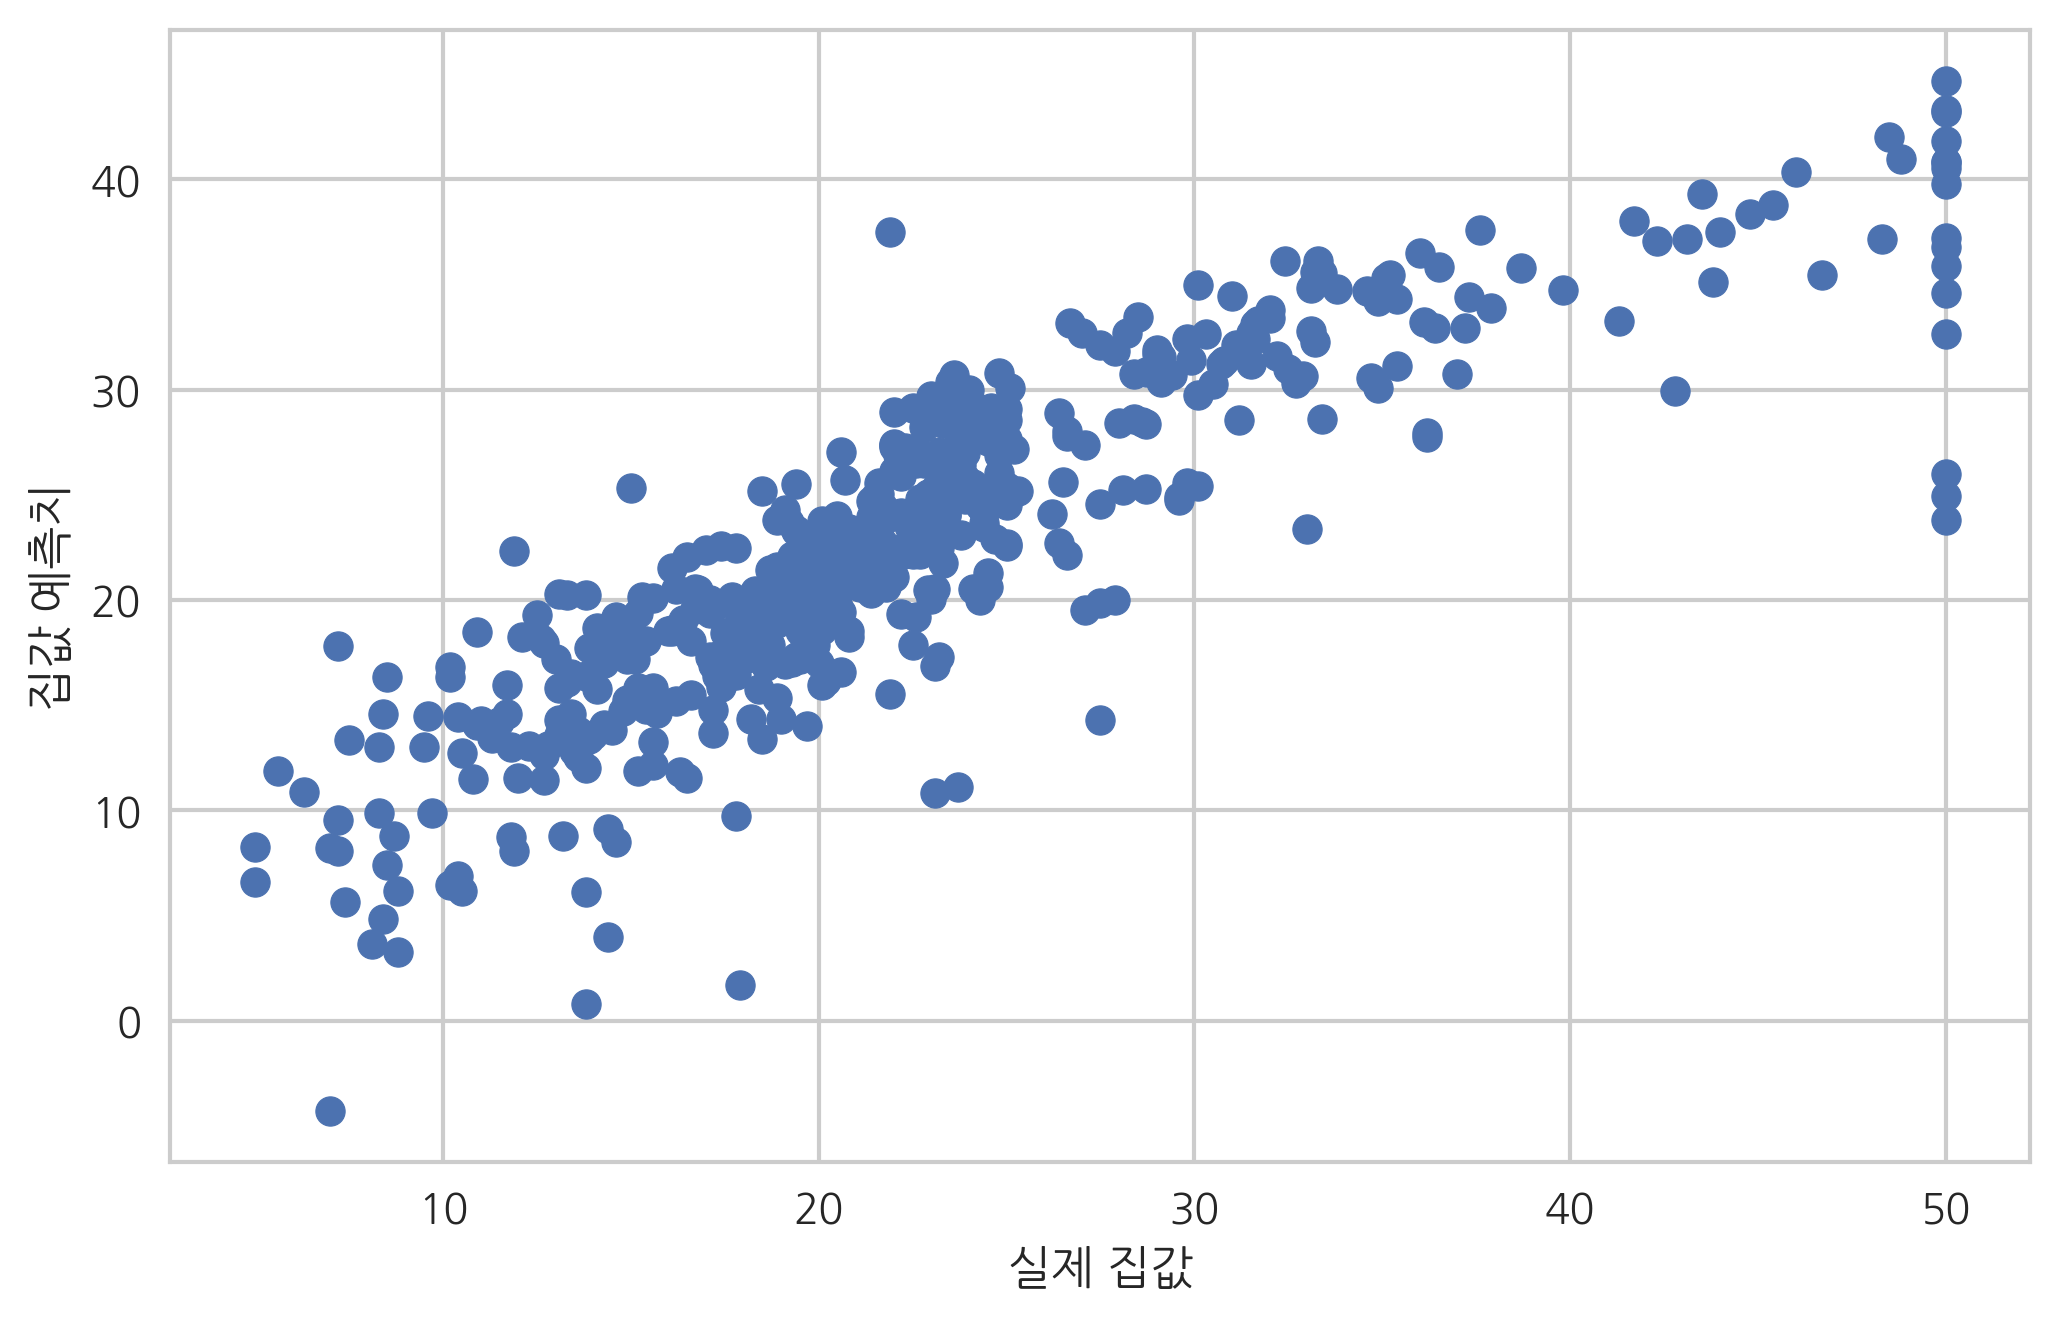

In [13]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

#### $y$와 $\hat{y}$의 scatter plot이 0을 지나는 직선이 되면 이 모델이 정확히 예측했다고 볼 수 있다

#### 연습 문제 1

1. `LinearRegression` 클래스를 사용하여 위에서 구한 1차원 가상 데이터 `X`, `y`를 회귀분석한다. 
2. 이렇게 구한 가중치 계수들의 값은 올바른 값에 대해 어느 정도의 오차를 보이는가?
3. 시드값을 다르게 하여 새로운 가상 데이터 `X`, `y`를 만들고 회귀분석을 한다. 이번에는 가중치 계수의 오차가 어떻게 달라졌는가? 가중치 계수의 오차는 일반적으로 어느 정도의 크기를 가지는가?

## StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.


1. `OLS` 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다. y와 x에 dataframe과 배열을 다 넣어도 되지만 dataframe을 넣어야 변수명도 인식한다
    ```
    model = OLS(y, X)
    ```
    
2. `fit` 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다..
    ```
    result = model.fit()
    ```

3. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [14]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        17:49:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

- 변수 가중치의 실제 값$w$은 coef값에서 std err만큼의 범위에 있을 것이다. CRIM 변수 가중치의 실제 값은 -0.1072에서 $\pm$ 0.033 사이에 있을 가능성이 높다.
- t 통계량 : $ \frac{\text{coef}}{\text{std err}}$ 로 구해지고, t-statistics 귀무가설은 coef = 0이다(아무관련이 없다). t 통계량의 채택역은 [0.025, 0.975] 의 값이다. 채택역에 0이 포함되어 있으면 그 변수의 부호가 음수, 양수 모두 가능하다는 뜻이므로 대부분 유의하지 않다.

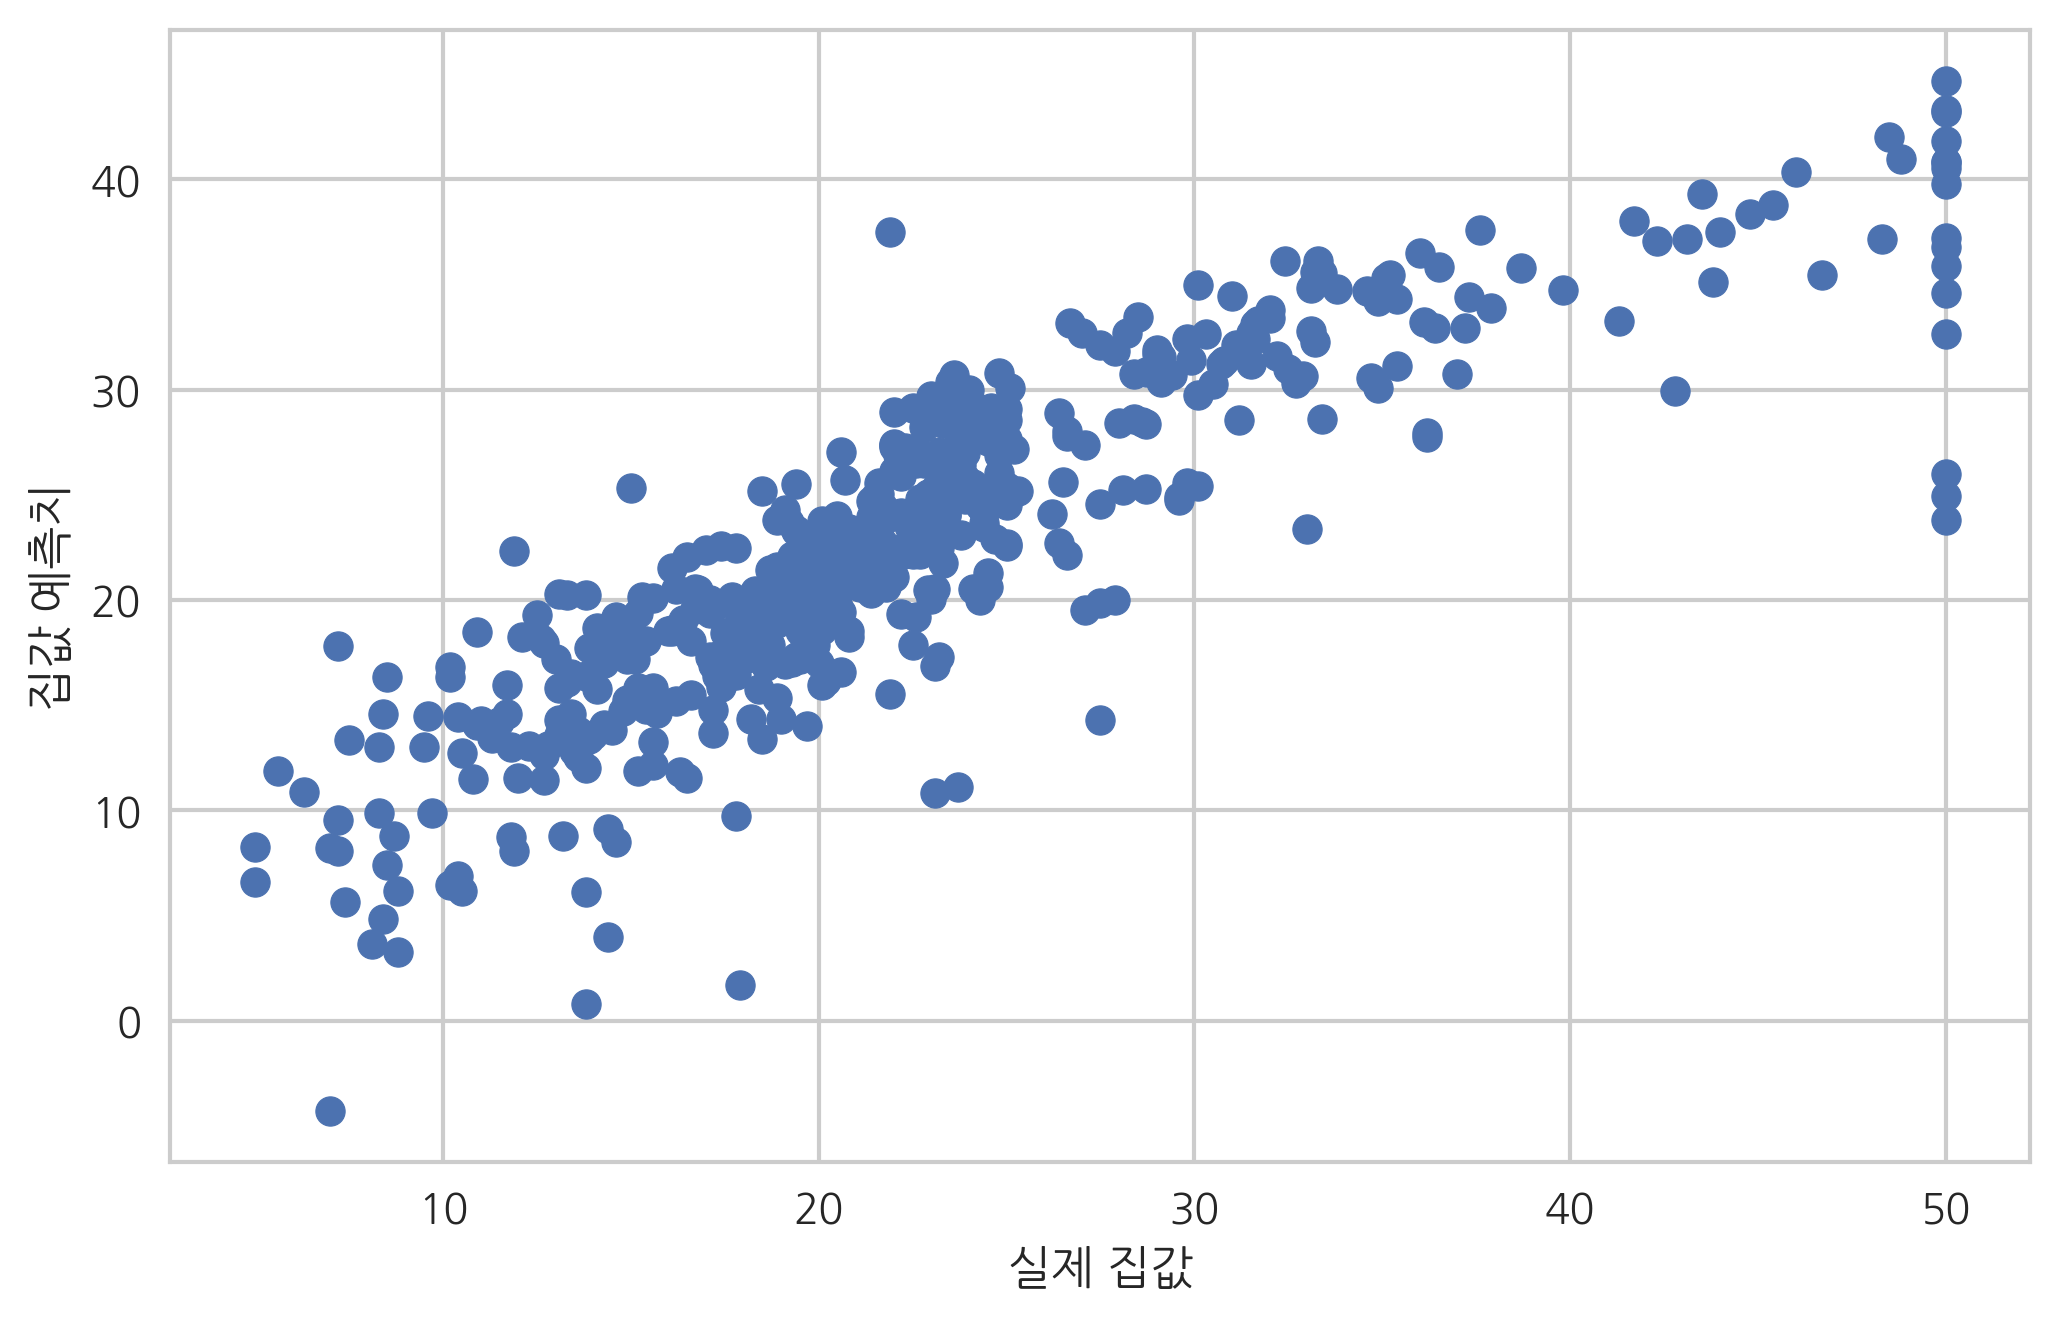

In [15]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자. 이 데이터는 원래 입력데이터의 평균값이다.

In [16]:
x_new = dfX0.mean().values
x_new

array([  3.59376071e+00,   1.13636364e+01,   1.11367787e+01,
         6.91699605e-02,   5.54695059e-01,   6.28463439e+00,
         6.85749012e+01,   3.79504269e+00,   9.54940711e+00,
         4.08237154e+02,   1.84555336e+01,   3.56674032e+02,
         1.26530632e+01])

`prediction` 명령의 인수로는 회귀 분석에 사용했던 원래 X 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 여기에서 데이터 행이 하나인 경우에는 `add_constant`에 `has_constant="add"` 인수를 추가해야 한다.

In [17]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                       columns=boston.feature_names), 
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.593761,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [18]:
result_boston2.predict(dfx_new)

0    22.532806
dtype: float64

직교 방정식에서 증명했던 것처럼 이 예측값은 y 데이터의 평균과 같다.

In [19]:
dfy.mean()

MEDV    22.532806
dtype: float64

#### 연습 문제 2

1. `OLS` 클래스를 사용하여 위에서 구한 1차원 가상 데이터 `X`, `y`를 회귀분석한다. 
2. 임의의 값 `x_new=1.0` 를 지정하여 이 값에 대한 모형 예측치 `y_new` 를 구하라.

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `resid`: 잔차 벡터
* `params`: 모수 벡터

In [20]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [21]:
result_boston2.resid.head()

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

이외에도 StatsModels 패키지는 회귀분석 결과를 살펴볼 수 있는 다양한 메서드와 도구를 제공한다.  `plot_regress_exog` 명령은 StatsModels 패키지가 제공하는 분석용 함수의 한 예이다.

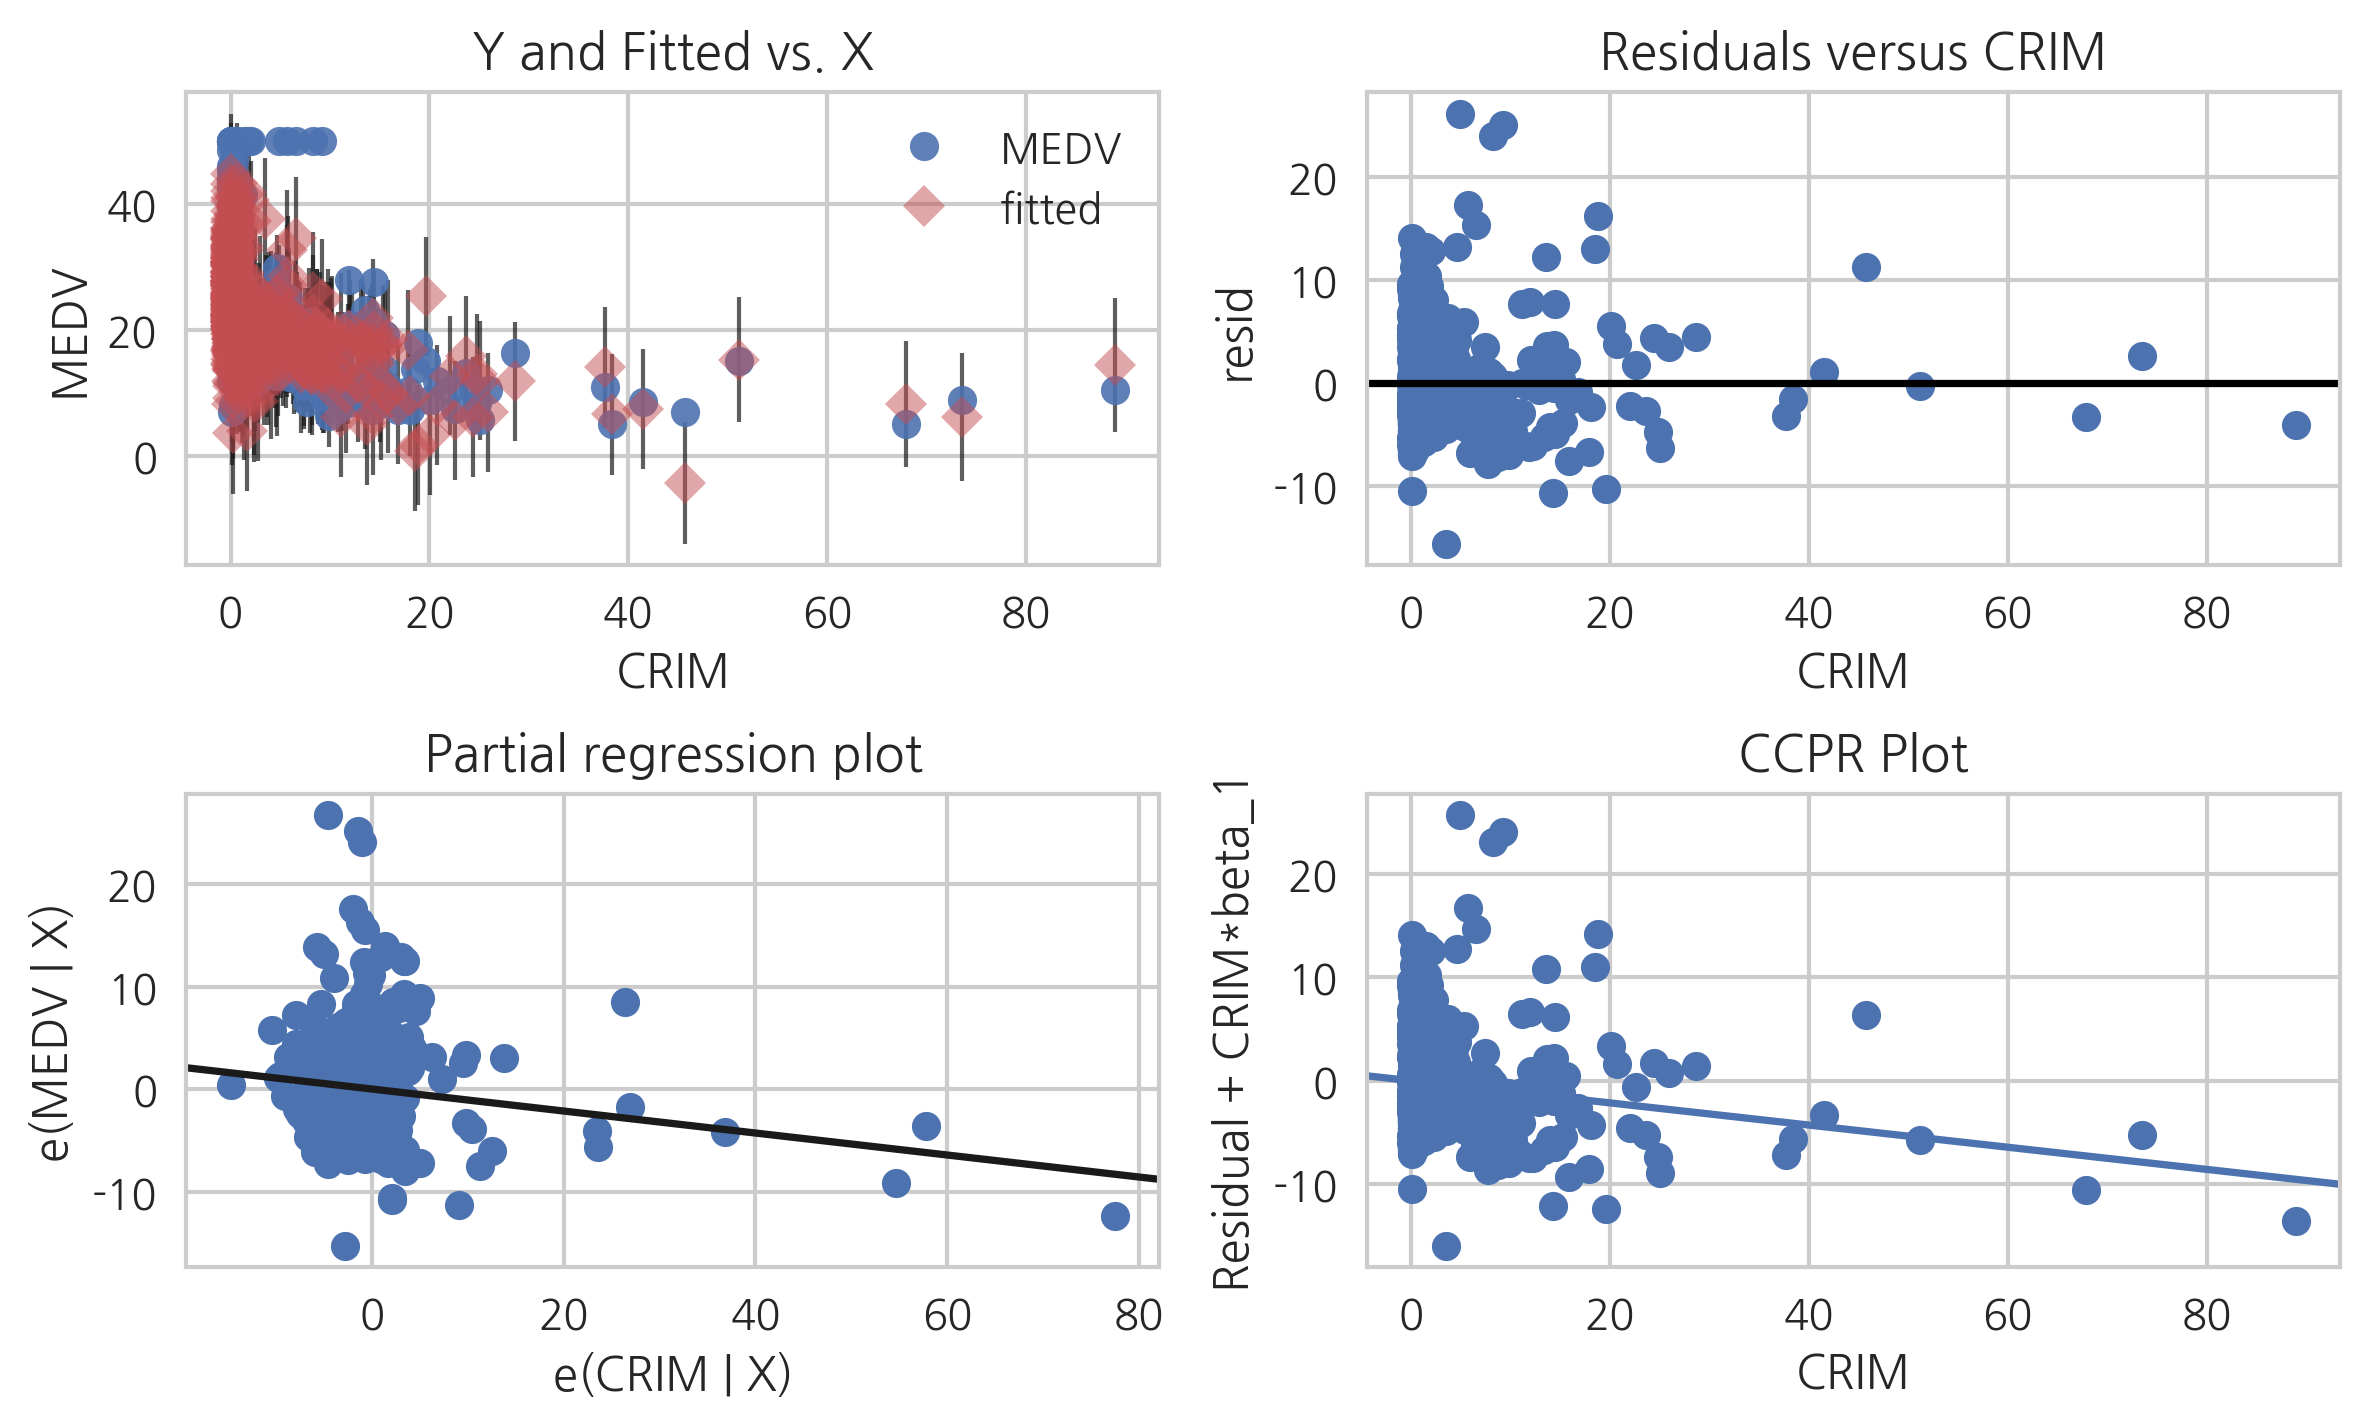

In [22]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

- 각각의 독립변수와 y값의 관계를 그려볼 수 있지만 상관관계의 부호가 항상 coef 부호와 동일하게 나타나지 않는다. y값에 다른 변수들의 영향도 포함되어 있기 때문이다.


- 첫번째 그림에서 세로선은 예측치오차를 나타내는데 그 선 밖에 잇는 데이터는 outlier로 볼 수 있다.
- 두번째 그림에서 x값이 달라져도 잔차분포에 영향이 없어야 한다. 잔차분포가 x값에 따라 변한다면 y에서 상관관계를 다 제거하지 못해 정보가 남아 있는 것으로 볼 수 있다. 잔차가 두 그룹으로 분리되어 나타나면, 데이터를 그 두 그룹으로 나눠 다른 모델을 적용해 보아야 한다.
- 세번째 그림은 y와 x값에서 다른 변수들이 미치는 영향을 제거한 것이다. coef와 동일한 상관관계를 나타내는 그래프를 볼 수 있다.


- 최적의 w를 뽑아내지 못한 이유
    1. 선형관계가 아닌 경우 : 2차 함수와 같이 나올 수 있다. 우리는 선형 모형을 썼기 때문에 비선형 관계는 남아 있는 것이다. -> 더 분석할 방법을 모르고 충분하다 하면 그냥 쓰고 다시 만들려면 비선형 모델, 다항회귀를 써야 한다. 
    2. 모델이 잘못된 경우 : x가 y를 제대로 설명하지 못했기 때문이다.